In [65]:
import pandas as pd

In [66]:
customer_data = pd.read_csv(r'C:\Users\USER\Desktop\ML\internsavy\Mall_Customers.csv')

In [67]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
customer_data.shape

(200, 5)

In [70]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [71]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()
customer_data['Age'] = scaler.fit_transform(customer_data['Age'].values.reshape(-1,1))
customer_data['Spending Score (1-100)'] = scaler.fit_transform(customer_data['Spending Score (1-100)'].values.reshape(-1,1))
customer_data['Annual Income (k$)'] = scaler.fit_transform(customer_data['Annual Income (k$)'].values.reshape(-1,1))
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,0.019231,0.000000,0.387755,4
1,2,Male,0.057692,0.000000,0.816327,2
2,3,Female,0.038462,0.008197,0.051020,4
3,4,Female,0.096154,0.008197,0.775510,2
4,5,Female,0.250000,0.016393,0.397959,4


In [87]:
from sklearn.cluster import KMeans

# Elbow method

In [88]:
kn = range(1,12)
ssc = []
for k in kn:
    km = KMeans(n_clusters = k)
    km.fit(customer_data[['Age','Annual Income (k$)','Spending Score (1-100)']])
    ssc.append(km.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [89]:
ssc

[37.401482160359436,
 22.560774882609753,
 17.370109472896697,
 12.650287676229912,
 10.304819147265867,
 8.385099035848988,
 7.207091516509937,
 6.29535274561706,
 5.636556904699543,
 5.0040772143125745,
 4.633450932726291]

In [90]:
from matplotlib import pyplot as plt

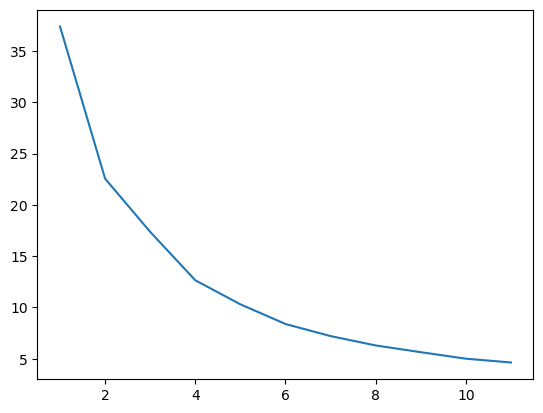

In [91]:
plt.plot(kn,ssc)

In [126]:
correlation = customer_data.corr()
correlation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.191856
Age,-0.026763,1.000000,-0.012398,-0.327227,0.204960
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.151807
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.342272
Cluster,-0.191856,0.204960,-0.151807,-0.342272,1.000000


<AxesSubplot:>

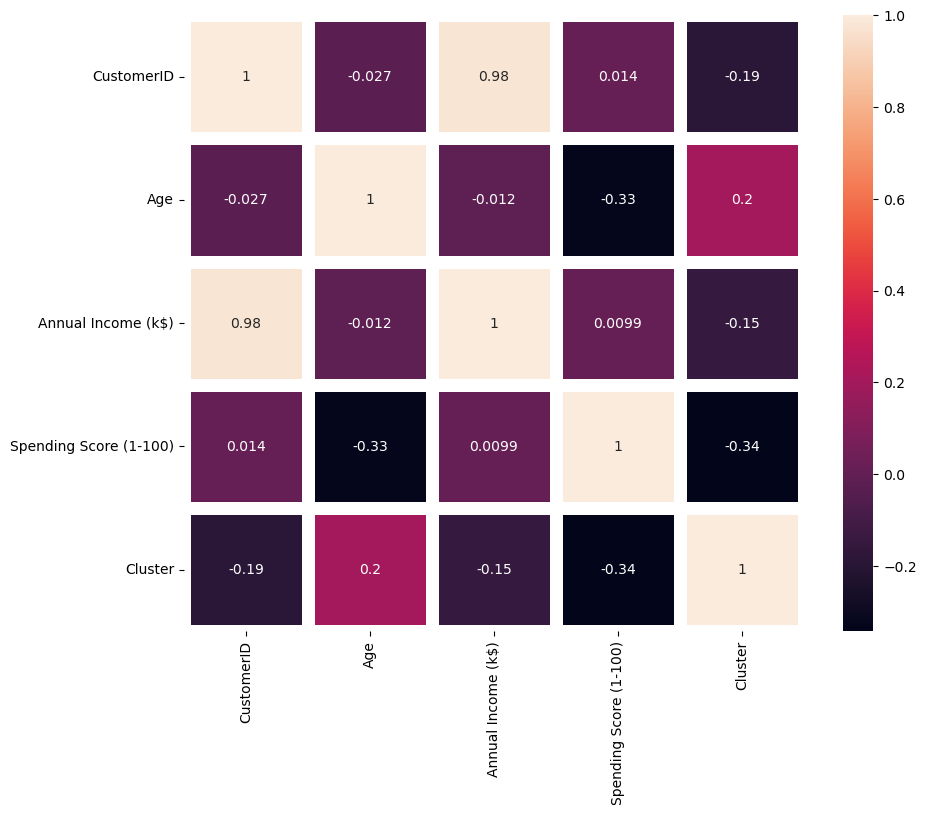

In [127]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,8))
sns.heatmap(correlation,linewidth=8,annot=True,cmap='rocket')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

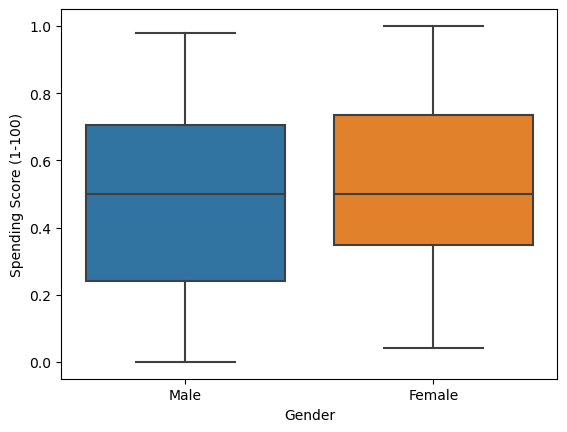

In [129]:
sns.boxplot(x=customer_data['Gender'],y=customer_data['Spending Score (1-100)'])

In [130]:
x = customer_data['Age']
y = customer_data['Spending Score (1-100)']

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'reression line with scatter plot')

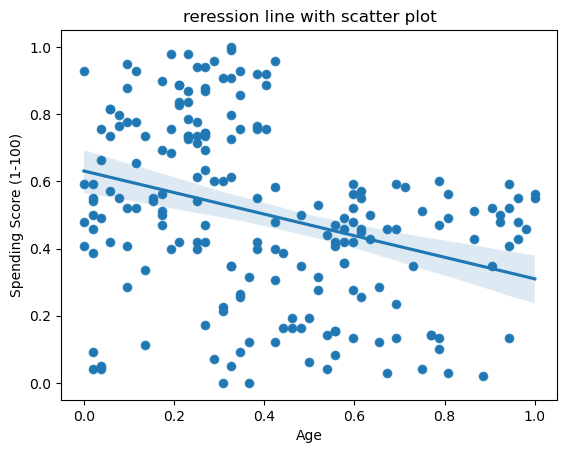

In [140]:
sns.scatterplot(x,y)
sns.regplot(x,y)
plt.title('reression line with scatter plot')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'reression line with scatter plot')

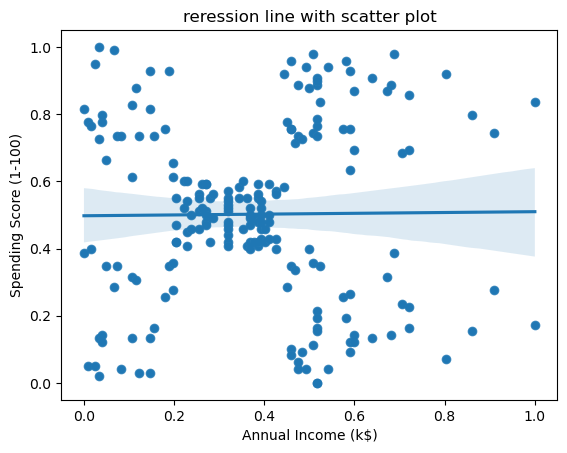

In [141]:
x = customer_data['Annual Income (k$)']
y = customer_data['Spending Score (1-100)']
sns.scatterplot(x,y)
sns.regplot(x,y)
plt.title('reression line with scatter plot')

# setting number of clusters = 6

# customer segmentation with Annual Income (k$) and Spending Score (1-100)

In [99]:
km = KMeans(n_clusters = 6)
model = km.fit_predict(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
model

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5])

In [100]:
customer_data['Cluster'] = model
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,0.019231,0.000000,0.387755,3
1,2,Male,0.057692,0.000000,0.816327,4
2,3,Female,0.038462,0.008197,0.051020,3
3,4,Female,0.096154,0.008197,0.775510,4
4,5,Female,0.250000,0.016393,0.397959,3


In [101]:
df1 = customer_data[customer_data.Cluster==0]
df2 = customer_data[customer_data.Cluster==1]
df3 = customer_data[customer_data.Cluster==2]
df4 = customer_data[customer_data.Cluster==3]
df5 = customer_data[customer_data.Cluster==4]
df6 = customer_data[customer_data.Cluster==5]

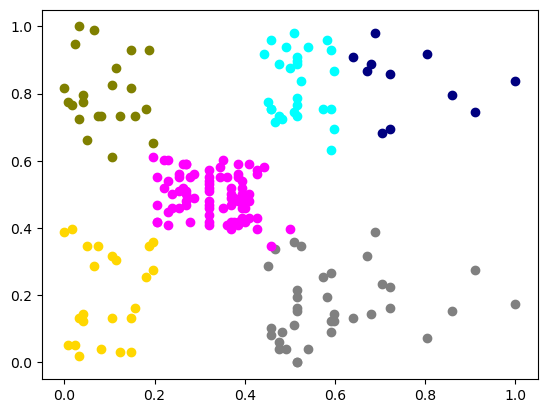

In [102]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],c = 'gray')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],c = 'cyan')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],c = 'magenta')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],c = 'gold')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],c = 'olive')
plt.scatter(df6['Annual Income (k$)'],df6['Spending Score (1-100)'],c = 'navy')

In [103]:
center = km.cluster_centers_
center

array([[0.59631148, 0.16921769],
       [0.51668618, 0.82543732],
       [0.32858607, 0.49706633],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894],
       [0.76378539, 0.83395176]])

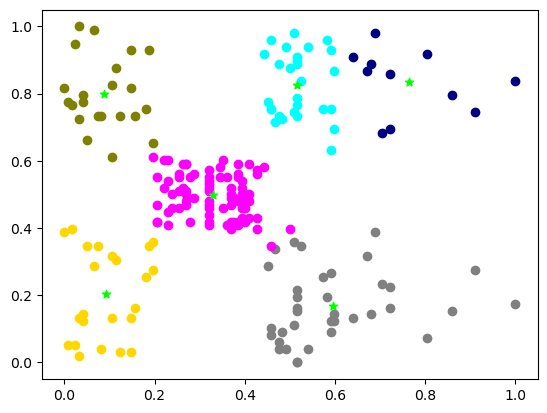

In [104]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],c = 'gray')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],c = 'cyan')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],c = 'magenta')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],c = 'gold')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],c = 'olive')
plt.scatter(df6['Annual Income (k$)'],df6['Spending Score (1-100)'],c = 'navy')
plt.scatter(center[:,0],center[:,1],c = 'lime',marker = '*')

# customer segmentation with Age and Spending Score (1-100)

In [107]:
km = KMeans(n_clusters = 6)
model = km.fit_predict(customer_data[['Age','Spending Score (1-100)']])
model

array([4, 0, 2, 0, 4, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 4, 1, 0, 2, 0,
       1, 0, 1, 0, 5, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 3, 0, 5, 4,
       1, 4, 5, 4, 4, 4, 5, 4, 4, 3, 5, 5, 5, 3, 4, 5, 3, 4, 3, 5, 3, 4,
       5, 3, 4, 4, 3, 5, 3, 3, 3, 4, 5, 5, 4, 5, 3, 5, 3, 5, 4, 5, 5, 4,
       4, 5, 3, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 5, 3, 4, 5, 4, 3, 5, 3, 3,
       3, 4, 5, 4, 4, 4, 3, 5, 5, 5, 4, 5, 5, 0, 4, 0, 5, 0, 1, 0, 1, 0,
       4, 0, 2, 0, 1, 0, 2, 0, 1, 0, 4, 0, 2, 0, 5, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 5, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 5, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 5, 0,
       2, 0])

In [108]:
customer_data['Cluster'] = model
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,0.019231,0.000000,0.387755,4
1,2,Male,0.057692,0.000000,0.816327,0
2,3,Female,0.038462,0.008197,0.051020,2
3,4,Female,0.096154,0.008197,0.775510,0
4,5,Female,0.250000,0.016393,0.397959,4


In [109]:
df1 = customer_data[customer_data.Cluster==0]
df2 = customer_data[customer_data.Cluster==1]
df3 = customer_data[customer_data.Cluster==2]
df4 = customer_data[customer_data.Cluster==3]
df5 = customer_data[customer_data.Cluster==4]
df6 = customer_data[customer_data.Cluster==5]

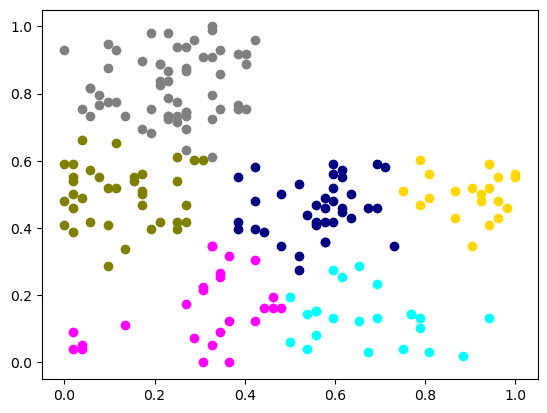

In [110]:
plt.scatter(df1['Age'],df1['Spending Score (1-100)'],c = 'gray')
plt.scatter(df2['Age'],df2['Spending Score (1-100)'],c = 'cyan')
plt.scatter(df3['Age'],df3['Spending Score (1-100)'],c = 'magenta')
plt.scatter(df4['Age'],df4['Spending Score (1-100)'],c = 'gold')
plt.scatter(df5['Age'],df5['Spending Score (1-100)'],c = 'olive')
plt.scatter(df6['Age'],df6['Spending Score (1-100)'],c = 'navy')

In [111]:
center = km.cluster_centers_
center

array([[0.2363103 , 0.8230716 ],
       [0.67056856, 0.13220941],
       [0.30153846, 0.15714286],
       [0.90096154, 0.49846939],
       [0.12713675, 0.49829932],
       [0.55925156, 0.4586321 ]])

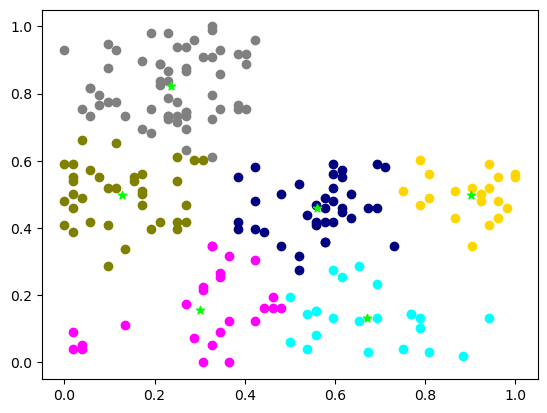

In [113]:
plt.scatter(df1['Age'],df1['Spending Score (1-100)'],c = 'gray')
plt.scatter(df2['Age'],df2['Spending Score (1-100)'],c = 'cyan')
plt.scatter(df3['Age'],df3['Spending Score (1-100)'],c = 'magenta')
plt.scatter(df4['Age'],df4['Spending Score (1-100)'],c = 'gold')
plt.scatter(df5['Age'],df5['Spending Score (1-100)'],c = 'olive')
plt.scatter(df6['Age'],df6['Spending Score (1-100)'],c = 'navy')
plt.scatter(center[:,0],center[:,1],c = 'lime',marker = '*')